In [19]:
import pathlib
path = pathlib.Path().resolve()
print(path)

/Users/eitanraitses/Desktop/repo


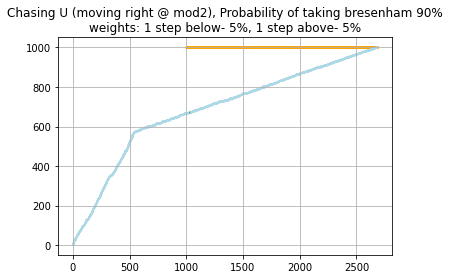

repeats over 2 times: 3
repeats over 10 times: 0
no repeats: 3365


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections
import os.path

def merge(list1, list2):
      
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
    return merged_list

def printDictionary(dict):
    for key,value in dict:
        print(key, value)

# s is size of dots
# title is title of plot and saved image
# csvfile is file of the data we are plotting
s = 1
title = "Chasing U (moving right @ mod2), Probability of taking bresenham 90%\nweights: 1 step below- 5%, 1 step above- 5%"
csvfile = "output.csv"

# need to have a 'chasingdata.csv' in the same directory as this file
data = np.genfromtxt(csvfile, delimiter=',', dtype = float)
u_i = [row[0] for row in data]
u_j = [row[1] for row in data]
v_i = [row[2] for row in data]
v_j = [row[3] for row in data]
time = len(v_j)

v_coords = merge(v_i, v_j);
#print(v_coords)

# go through v_coords to find repeats

freq = {}
color = []

for coord in v_coords:
    if (coord in freq):
        freq[coord] += 1
    else:
        freq[coord] = 1

#uncomment to print  
#printDictionary(freq.items())
    
over_2 = 0
over_10 = 0
regular = 0

for i in range(len(v_coords)):
    if freq.get(v_coords[i]) > 10:
        color.append('red')
        over_10 +=1
    elif freq.get(v_coords[i]) > 2:
        color.append('black')
        over_2 +=1
    else:
        color.append('lightblue')
        regular +=1

# set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title(title)
ax.grid(True)

# add points to plot
ax.scatter(u_i,u_j, s=s,c='orange')
ax.scatter(v_i,v_j, s=s,c=color)

# save in graphs/ directory
path = 'graphs/'+title+'.png'
dirname = os.path.dirname(path)
plt.savefig(path, dpi=400)
plt.show()
print("repeats over 2 times:", over_2)
print("repeats over 10 times:", over_10)
print("no repeats:", regular)
